In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score, roc_auc_score, make_scorer

In [3]:
dataset=pd.read_csv('weatherHistoryCleaned.csv')
dataset

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour,Summary
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0,Partly Cloudy
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1,Partly Cloudy
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2,Mostly Cloudy
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3,Partly Cloudy
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19,Partly Cloudy
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20,Partly Cloudy
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21,Partly Cloudy
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22,Partly Cloudy


## **About Dataset**

---



In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precip Type             96453 non-null  int64  
 1   Temperature (C)         96453 non-null  float64
 2   Humidity                96453 non-null  float64
 3   Wind Speed (km/h)       96453 non-null  float64
 4   Wind Bearing (degrees)  96453 non-null  float64
 5   Visibility (km)         96453 non-null  float64
 6   Pressure (millibars)    96453 non-null  float64
 7   Month                   96453 non-null  int64  
 8   Hour                    96453 non-null  int64  
 9   Summary                 96453 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 7.4+ MB


In [5]:
dataset.describe()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.888941,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956,6.523799,11.500327
std,0.314207,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906,3.448495,6.922081
min,0.000000,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000,4.000000,6.000000
50%,1.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,7.000000,12.000000
75%,1.000000,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,10.000000,18.000000
max,1.000000,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,12.000000,23.000000


In [6]:
dataset.describe(include='object')

,Summary
count,96453
unique,4
top,Partly Cloudy
freq,32290


## **Features**

---



In [7]:
features=dataset.drop('Summary',axis=1)
features.head(5)

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4


## **Target**

---



In [8]:
target=dataset['Summary']
target.head(5)

0    Partly Cloudy
1    Partly Cloudy
2    Mostly Cloudy
3    Partly Cloudy
4    Mostly Cloudy
Name: Summary, dtype: object

In [9]:
type(target)
target_df=target.to_frame()
Summary_count=target_df.value_counts().reset_index()
Summary_count.columns=["Summary","Count"]
Summary_count

,Summary,Count
0,Partly Cloudy,32290
1,Mostly Cloudy,28664
2,Other,18322
3,Overcast,17177


In [10]:
target_df=target.to_frame()
target_df

,Summary
0,Partly Cloudy
1,Partly Cloudy
2,Mostly Cloudy
3,Partly Cloudy
4,Mostly Cloudy
...,...
96448,Partly Cloudy
96449,Partly Cloudy
96450,Partly Cloudy
96451,Partly Cloudy


## **Creating Model**

In [11]:
input_df = dataset.drop('Summary',axis=1)
input_df
output_df=dataset['Summary']
output_df

0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
             ...      
96448    Partly Cloudy
96449    Partly Cloudy
96450    Partly Cloudy
96451    Partly Cloudy
96452    Partly Cloudy
Name: Summary, Length: 96453, dtype: object

In [12]:
X,y=input_df.values,output_df.values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
'''from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(dataset, target = 'Summary',
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


from imblearn.under_sampling import RandomUnderSampler
# Apply undersampling only to the majority class in the training set
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)'''

"from fast_ml.model_development import train_valid_test_split\nX_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(dataset, target = 'Summary',\n                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)\nprint(X_train.shape), print(y_train.shape)\nprint(X_valid.shape), print(y_valid.shape)\nprint(X_test.shape), print(y_test.shape)\n\n\nfrom imblearn.under_sampling import RandomUnderSampler\n# Apply undersampling only to the majority class in the training set\nundersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)\nX_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)"

In [17]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\nX_valid = scaler.transform(X_valid)'

In [18]:
#Finding best fit k value
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31,2):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i,p=1,weights="distance")
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))


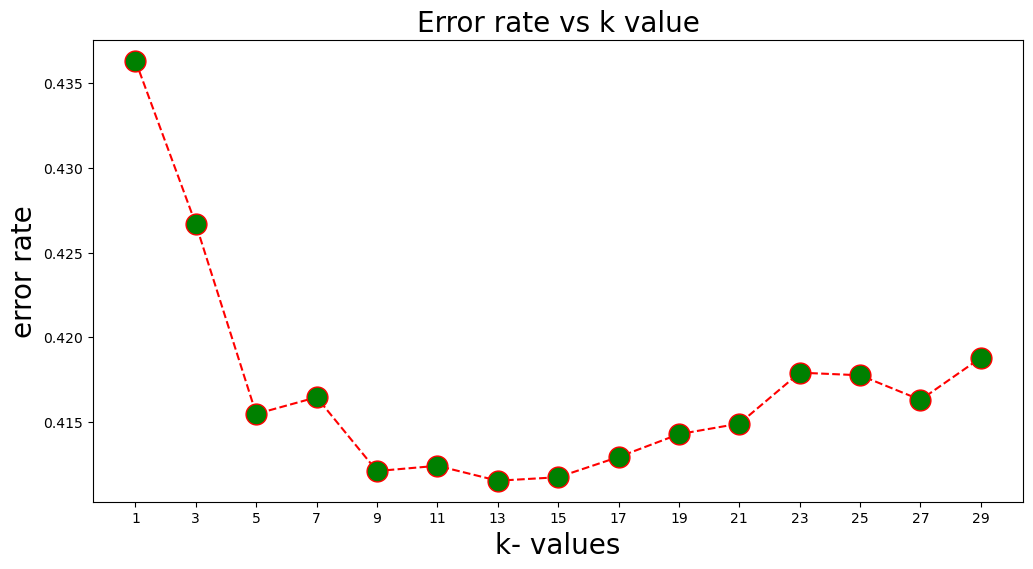

In [19]:
#plotting the error rate vs k graph
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,31,2),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,30,2))
plt.show()

In [20]:
def make_prediction(model,test_data,):              
    y_pred=model.predict(test_data)
    y_proba = model.predict_proba(test_data)
    return {'y_pred': y_pred,'y_proba':y_proba}
def eval_model(model,x_test,Y_test,x_train,Y_train):
  
   # prediction on test set
    y_pred_test=model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)
   # prediction on train set
    y_proba_train = model.predict_proba(X_train)
    y_pred_train=model.predict(x_train)

    # Calculate ROC AUC for each class (for train)
    roc_auc_scores1 = roc_auc_score(y_train, y_proba_train, multi_class='ovr')
    roc_auc_scores2= roc_auc_score(y_train, y_proba_train, multi_class='ovo')
    # Calculate ROC AUC for each class (for test)
    roc_auc_scores3 = roc_auc_score(Y_test, y_proba_test, multi_class='ovr')
    roc_auc_scores4= roc_auc_score(Y_test, y_proba_test, multi_class='ovo')
    print("ROC AUC score:\n","Train Set:")
    print("ovr: ",round(roc_auc_scores1,2),"  ovo: ",round(roc_auc_scores2,2))
    print("ROC AUC score:\n","Test Set:")
    print("ovr: ",round(roc_auc_scores3,2),"  ovo: ",round(roc_auc_scores4,2))

    #Confusion Matrix
    print("\nconfusion_matrix:\n",confusion_matrix(Y_test, y_pred_test))
    p=np.round(precision_score(Y_test, y_pred_test,average=None),2)
    r=np.round(recall_score(Y_test, y_pred_test,average=None),2)
    classificationscore_test=round(model.score(X_test,Y_test),2)
    classificationscore_train=round(model.score(x_train,Y_train),2)
    print("\nprecision_score: ",p,"\nrecall_score: ",r)
    print(classification_report(Y_test, y_pred_test),"\naccuracy",round(accuracy_score(Y_test, y_pred_test),2),"\nclassificationscore(testset): ",classificationscore_test,"\nclassificationscore(trainset): ",classificationscore_train)

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, make_scorer
# Assuming you have your feature matrix in 'X' and corresponding labels in 'y'
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters and their possible values
grid_params = {
    'n_neighbors': np.arange(1,20) ,
    'weights': ['uniform', 'distance'],
    'p': [1, 2] #{p = 1: manhattan_distance, p=2: euclidean_distance,default: minkowski_distance}.
   # 'metric': ['minkowski','manhattan','euclidean']
}
# Specify the number of folds (k)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
auc_roc_scorer = make_scorer(roc_auc_score,needs_proba=True, multi_class='ovr')
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, grid_params, scoring=auc_roc_scorer, cv=kfold,error_score='raise',return_train_score=True)   # Define the scoring metric as AUC-ROC
clf=grid_search.fit(X, y)
#best model
best_model_dt=clf.best_estimator_

# Evaluate the best model's performance on the test set
test_auc_roc_score = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

# Print the best hyperparameters, best model and corresponding AUC-ROC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)
print("AUC-ROC Score on Test Set:", test_auc_roc_score)
print("Selected Model:", best_model_dt)

In [21]:
# KNN_classifier User-defined function

def knn_classifier(X_train, y_train,X_test,n_neighbors=29,p=1,weights="distance"):
    '''
    This function train the model with KNeighborsClassifier and prints the values of performance 
    evaluation metrics.
    
    input:
        X_train:  train data of input features.
        y_train:  train data of target.
        X_test:   test data of input feature, by which we predict the output
        n_neighbors:  by default set to 29
        p: by default set to 1,
        weights: by default set to distance.
    '''
    fknn = KNeighborsClassifier(n_neighbors=n_neighbors,p=p,weights=weights)
    fknn.fit(X_train, y_train)
    return fknn


In [22]:
# Evaluating KNN_Model1  (best parameters)
model1 = knn_classifier(X_train,y_train,X_test,29,1,'distance')
eval_model(model1,X_test,y_test,X_train,y_train)

ROC AUC score:
 Train Set:
ovr:  1.0   ovo:  1.0
ROC AUC score:
 Test Set:
ovr:  0.83   ovo:  0.83

confusion_matrix:
 [[2843  220  674 2100]
 [ 306 2097  179 1065]
 [ 977  196 1799  410]
 [1345  366  241 4473]]

precision_score:  [0.52 0.73 0.62 0.56] 
recall_score:  [0.49 0.57 0.53 0.7 ]
               precision    recall  f1-score   support

Mostly Cloudy       0.52      0.49      0.50      5837
        Other       0.73      0.57      0.64      3647
     Overcast       0.62      0.53      0.57      3382
Partly Cloudy       0.56      0.70      0.62      6425

     accuracy                           0.58     19291
    macro avg       0.61      0.57      0.58     19291
 weighted avg       0.59      0.58      0.58     19291
 
accuracy 0.58 
classificationscore(testset):  0.58 
classificationscore(trainset):  1.0


In [23]:
# Evaluating KNN_Model 2

knn2=knn_classifier(X_train,y_train,X_test,n_neighbors=15,p=2,weights='uniform')
eval_model(knn2,X_test,y_test,X_train,y_train)

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

ROC AUC score:
 Train Set:
ovr:  0.86   ovo:  0.87
ROC AUC score:
 Test Set:
ovr:  0.81   ovo:  0.82

confusion_matrix:
 [[2966  289  717 1865]
 [ 420 2097  196  934]
 [1103  238 1643  398]
 [1712  469  274 3970]]


C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 


precision_score:  [0.48 0.68 0.58 0.55] 
recall_score:  [0.51 0.57 0.49 0.62]
               precision    recall  f1-score   support

Mostly Cloudy       0.48      0.51      0.49      5837
        Other       0.68      0.57      0.62      3647
     Overcast       0.58      0.49      0.53      3382
Partly Cloudy       0.55      0.62      0.58      6425

     accuracy                           0.55     19291
    macro avg       0.57      0.55      0.56     19291
 weighted avg       0.56      0.55      0.55     19291
 
accuracy 0.55 
classificationscore(testset):  0.55 
classificationscore(trainset):  0.62


In [24]:
# Evaluating KNN_Model 3

knn3=knn_classifier(X_train,y_train,X_test,n_neighbors=25,p=1,weights='uniform')
eval_model(knn3,X_test,y_test,X_train,y_train)

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

ROC AUC score:
 Train Set:
ovr:  0.85   ovo:  0.86
ROC AUC score:
 Test Set:
ovr:  0.82   ovo:  0.82

confusion_matrix:
 [[2947  244  660 1986]
 [ 365 2076  176 1030]
 [1123  222 1647  390]
 [1547  407  245 4226]]


C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 


precision_score:  [0.49 0.7  0.6  0.55] 
recall_score:  [0.5  0.57 0.49 0.66]
               precision    recall  f1-score   support

Mostly Cloudy       0.49      0.50      0.50      5837
        Other       0.70      0.57      0.63      3647
     Overcast       0.60      0.49      0.54      3382
Partly Cloudy       0.55      0.66      0.60      6425

     accuracy                           0.56     19291
    macro avg       0.59      0.55      0.57     19291
 weighted avg       0.57      0.56      0.56     19291
 
accuracy 0.56 
classificationscore(testset):  0.56 
classificationscore(trainset):  0.61


## **Decision Tree**

In [25]:
def DecTree(X_train,y_train,X_test,max_depth=None, min_samples_split= 2, min_samples_leaf= 2,criterion='gini'):
    '''
    This function train the model using Logistic Regression and prints the values of performance 
    evaluation metrics.
    
    parameters:
        X_train:       train data of input features.
        y_train:       train data of target.
        X_test:        test data of input feature, by which we predict the output
        multi_class:   by default set to 'auto'
        max_depth:     maximum depth of tree, be default set to None
        min_samples_split:   by default its value is 2
        min_samples_leaf:    by default its value is 2
        criterion:           the criteria of impurity selection, by default gini index is used
    '''
    flogreg = DecisionTreeClassifier(max_depth=max_depth, min_samples_split= min_samples_split, min_samples_leaf= min_samples_leaf,criterion=criterion,random_state=42)
    flogreg.fit(X_train, y_train)
    return flogreg

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10],                    # Try different maximum depths of the tree
    'min_samples_split': [2, 5, 10],                # Try different minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Try different minimum number of samples required to be at a leaf node
                                                    # Try different options for the maximum number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']                # Try different impurity criteria (Gini index or entropy)
}

# Create AUC-ROC scorer
auc_roc_scorer = make_scorer(roc_auc_score,needs_proba=True, multi_class='ovr')

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, scoring=auc_roc_scorer, cv=5)
clf=grid_search.fit(X, y)

#best model
best_model_dt=clf.best_estimator_

# Evaluate the best model's performance on the test set
test_auc_roc_score = roc_auc_score(y_test, best_model_dt.predict_proba(X_test), multi_class='ovr')

# Print the best hyperparameters, best model and corresponding AUC-ROC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)
print("AUC-ROC Score on Test Set:", test_auc_roc_score)
print("Selected Model:", best_model_dt)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best AUC-ROC Score: 0.7599283640587953
AUC-ROC Score on Test Set: 0.805241067470952
Selected Model: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)


In [27]:
#Best Model
fdt1 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
fdt1.fit(X_train, y_train)
eval_model(fdt1,X_test,y_test,X_train,y_train)

ROC AUC score:
 Train Set:
ovr:  0.81   ovo:  0.82
ROC AUC score:
 Test Set:
ovr:  0.79   ovo:  0.8

confusion_matrix:
 [[2553  125  849 2310]
 [ 397 1896  203 1151]
 [1197   53 1609  523]
 [1591  266  346 4222]]

precision_score:  [0.44 0.81 0.54 0.51] 
recall_score:  [0.44 0.52 0.48 0.66]
               precision    recall  f1-score   support

Mostly Cloudy       0.44      0.44      0.44      5837
        Other       0.81      0.52      0.63      3647
     Overcast       0.54      0.48      0.50      3382
Partly Cloudy       0.51      0.66      0.58      6425

     accuracy                           0.53     19291
    macro avg       0.58      0.52      0.54     19291
 weighted avg       0.55      0.53      0.53     19291
 
accuracy 0.53 
classificationscore(testset):  0.53 
classificationscore(trainset):  0.56


In [28]:
#2nd model
fdt2 = DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
fdt2.fit(X_train, y_train)
eval_model(fdt2,X_test,y_test,X_train,y_train)

ROC AUC score:
 Train Set:
ovr:  0.81   ovo:  0.82
ROC AUC score:
 Test Set:
ovr:  0.79   ovo:  0.8

confusion_matrix:
 [[2713  155  756 2213]
 [ 470 1985  147 1045]
 [1173   70 1573  566]
 [1745  353  259 4068]]

precision_score:  [0.44 0.77 0.58 0.52] 
recall_score:  [0.46 0.54 0.47 0.63]
               precision    recall  f1-score   support

Mostly Cloudy       0.44      0.46      0.45      5837
        Other       0.77      0.54      0.64      3647
     Overcast       0.58      0.47      0.51      3382
Partly Cloudy       0.52      0.63      0.57      6425

     accuracy                           0.54     19291
    macro avg       0.58      0.53      0.54     19291
 weighted avg       0.55      0.54      0.54     19291
 
accuracy 0.54 
classificationscore(testset):  0.54 
classificationscore(trainset):  0.56


In [32]:
#3rd Model
fdt3 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf= 4, min_samples_split= 4)
fdt3.fit(X_train, y_train)
eval_model(fdt3,X_test,y_test,X_train,y_train)

ROC AUC score:
 Train Set:
ovr:  0.81   ovo:  0.82
ROC AUC score:
 Test Set:
ovr:  0.79   ovo:  0.8

confusion_matrix:
 [[2715  154  754 2214]
 [ 470 1984  147 1046]
 [1173   70 1573  566]
 [1746  351  258 4070]]

precision_score:  [0.44 0.78 0.58 0.52] 
recall_score:  [0.47 0.54 0.47 0.63]
               precision    recall  f1-score   support

Mostly Cloudy       0.44      0.47      0.45      5837
        Other       0.78      0.54      0.64      3647
     Overcast       0.58      0.47      0.51      3382
Partly Cloudy       0.52      0.63      0.57      6425

     accuracy                           0.54     19291
    macro avg       0.58      0.53      0.54     19291
 weighted avg       0.55      0.54      0.54     19291
 
accuracy 0.54 
classificationscore(testset):  0.54 
classificationscore(trainset):  0.56


## **Logistic Regression**

In [ ]:
# K-Fold Validation for Logistic Regression

# Create a Logistic Regression classifier
logreg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=500)

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l2'],                 # Regularization penalty options
    'C': [0.1, 1.0, 10.0],                    # Inverse of regularization strength
    'solver': ['lbfgs', 'newton-cg']           # Solver options
}

# Create AUC-ROC scorer
auc_roc_scorer = make_scorer(roc_auc_score,needs_proba=True, multi_class='ovr')

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, scoring=auc_roc_scorer, cv=5)
clf=grid_search.fit(X, y)

#best model
best_model_log=clf.best_estimator_

# Evaluate the best model's performance on the test set
test_auc_roc_score = roc_auc_score(y_test, best_model_log.predict_proba(X_test), multi_class='ovr')

# Print the best hyperparameters, best model and corresponding AUC-ROC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)
print("AUC-ROC Score on Test Set:", test_auc_roc_score)
print("Selected Model:", best_model_log)


In [ ]:
def logisticRegr(X_train,y_train,X_test,multi_class='auto', C= 10.0, penalty= 'l2', solver= 'newton-cg',max_iter=1000,weight=None):
    '''
    This function train the model using Logistic Regression and prints the values of performance 
    evaluation metrics.
    
    parameters:
        X_train:       train data of input features.
        y_train:       train data of target.
        X_test:        test data of input feature, by which we predict the output
        multi_class:   by default set to 'auto'
        C:             by default set to 10.0
        penalty:       by default set to 'l2'
        solver:        by default set to 'newton-cg'
        max_iter:      by default set to 1000
    '''
    flogreg = LogisticRegression(multi_class=multi_class, C=C, penalty=penalty, solver=solver,max_iter=max_iter,random_state=42)
    flogreg.fit(X_train, y_train)
    return flogreg

In [ ]:
# Evaluating Logistic_Regression_Model 1
logreg1=logisticRegr(X_train,y_train,X_test,multi_class='auto', C= 10.0, penalty= 'l2', solver= 'newton-cg',max_iter=1000)
eval_model(logreg1,X_test,y_test)

In [ ]:
# Evaluating Logistic_Regression_Model 2  

logreg2=logisticRegr(X_train,y_train,X_test,multi_class='auto', C= 0.01, penalty= 'l2', solver= 'lbfgs',max_iter=1000,weight='balanced')
eval_model(logreg2,X_test,y_test,X_train,y_train)

In [ ]:
# Evaluating Logistic_Regression_Model 3

logreg3=logisticRegr(X_train,y_train,X_test,multi_class='auto', C= 0.1, penalty= 'l2', solver= 'newton-cg',max_iter=1500)
eval_model(logreg3,X_test,y_test,X_train,y_train)

## MLP_CLASSIFIER

In [ ]:
# K-Fold for Multilayer Perceptron

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create an MLPClassifier object
mlp = MLPClassifier(early_stopping=True, validation_fraction=0.2, n_iter_no_change=5, tol=1e-4)

# Create a scorer for roc_auc_score
mlp_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=mlp_scorer)

clf=grid_search.fit(X, y)

#best model
best_model_mlp=clf.best_estimator_

# Evaluate the best model's performance on the test set
test_auc_roc_score = roc_auc_score(y_test, best_model_mlp.predict_proba(X_test), multi_class='ovr')

# Print the best hyperparameters, best model and corresponding AUC-ROC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)
print("AUC-ROC Score on Test Set:", test_auc_roc_score)
print("Selected Model:", best_model_mlp)

In [33]:
def mlp_Classifier(X_train,y_train,X_test,hidden_layer_sizes=(100,50),alpha=0.0001,learning_rate='constant', activation='relu', solver='adam'):
    '''
    This function train the model using Logistic Regression and prints the values of performance 
    evaluation metrics.
    
    parameters:
        X_train:       train data of input features.
        y_train:       train data of target.
        X_test:        test data of input feature, by which we predict the output
        hidden_laye_size:  two hidden layers, by default(100,50)
        alpha: by default value is 0.0001
        learning_rate:  by default value is constant
        activation :    by default the activation function used is relu
        solver:         by default 'adam' is used as a solver
        
        '''
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,alpha=alpha,learning_rate=learning_rate, activation=activation, solver=solver, random_state=42)

    # Train the model
    mlp.fit(X_train, y_train)

    return mlp

In [34]:
# BEST MODEL:
mlp1=mlp_Classifier(X_train,y_train,X_test,hidden_layer_sizes=(100,50),alpha=0.0001,learning_rate='constant', activation='relu', solver='adam')

eval_model(mlp1,X_test,y_test,X_train,y_train)

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC score:
 Train Set:
ovr:  0.85   ovo:  0.86
ROC AUC score:
 Test Set:
ovr:  0.82   ovo:  0.84

confusion_matrix:
 [[2762  178 1126 1771]
 [ 306 2092  225 1024]
 [ 852   74 2135  321]
 [1607  397  427 3994]]

precision_score:  [0.5  0.76 0.55 0.56] 
recall_score:  [0.47 0.57 0.63 0.62]
               precision    recall  f1-score   support

Mostly Cloudy       0.50      0.47      0.49      5837
        Other       0.76      0.57      0.65      3647
     Overcast       0.55      0.63      0.59      3382
Partly Cloudy       0.56      0.62      0.59      6425

     accuracy                           0.57     19291
    macro avg       0.59      0.57      0.58     19291
 weighted avg       0.58      0.57      0.57     19291
 
accuracy 0.57 
classificationscore(testset):  0.57 
classificationscore(trainset):  0.6


In [35]:
#  MODEL 2:

mlp2 = mlp_Classifier(X_train,y_train,X_test,hidden_layer_sizes=(100,50),alpha=0.0001,learning_rate='constant', activation='relu', solver='adam')
eval_model(mlp2,X_test,y_test,X_train,y_train)

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC score:
 Train Set:
ovr:  0.85   ovo:  0.86
ROC AUC score:
 Test Set:
ovr:  0.82   ovo:  0.84

confusion_matrix:
 [[2762  178 1126 1771]
 [ 306 2092  225 1024]
 [ 852   74 2135  321]
 [1607  397  427 3994]]

precision_score:  [0.5  0.76 0.55 0.56] 
recall_score:  [0.47 0.57 0.63 0.62]
               precision    recall  f1-score   support

Mostly Cloudy       0.50      0.47      0.49      5837
        Other       0.76      0.57      0.65      3647
     Overcast       0.55      0.63      0.59      3382
Partly Cloudy       0.56      0.62      0.59      6425

     accuracy                           0.57     19291
    macro avg       0.59      0.57      0.58     19291
 weighted avg       0.58      0.57      0.57     19291
 
accuracy 0.57 
classificationscore(testset):  0.57 
classificationscore(trainset):  0.6


In [36]:
# MODEL 3:

mlp3 = mlp_Classifier(X_train,y_train,X_test,hidden_layer_sizes=(100,50),alpha=0.0001,learning_rate='constant', activation='relu', solver='adam')
eval_model(mlp3,X_test,y_test,X_train,y_train)

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC score:
 Train Set:
ovr:  0.85   ovo:  0.86
ROC AUC score:
 Test Set:
ovr:  0.82   ovo:  0.84

confusion_matrix:
 [[2762  178 1126 1771]
 [ 306 2092  225 1024]
 [ 852   74 2135  321]
 [1607  397  427 3994]]

precision_score:  [0.5  0.76 0.55 0.56] 
recall_score:  [0.47 0.57 0.63 0.62]
               precision    recall  f1-score   support

Mostly Cloudy       0.50      0.47      0.49      5837
        Other       0.76      0.57      0.65      3647
     Overcast       0.55      0.63      0.59      3382
Partly Cloudy       0.56      0.62      0.59      6425

     accuracy                           0.57     19291
    macro avg       0.59      0.57      0.58     19291
 weighted avg       0.58      0.57      0.57     19291
 
accuracy 0.57 
classificationscore(testset):  0.57 
classificationscore(trainset):  0.6


# Saving Models

In [37]:
import pickle

In [38]:
with open("knn1.pkl", 'wb') as file:
    pickle.dump(model1, file)

In [39]:
with open("knn2.pkl", 'wb') as file:
    pickle.dump(knn2, file)

In [40]:
with open("knn3.pkl", 'wb') as file:
    pickle.dump(knn3, file)

In [41]:
with open("fdt1.pkl", 'wb') as file:
    pickle.dump(fdt1, file)

In [42]:
with open("fdt2.pkl", 'wb') as file:
    pickle.dump(fdt2, file)

In [43]:
with open("fdt3.pkl", 'wb') as file:
    pickle.dump(fdt3, file)

In [44]:
with open("mlp1.pkl", 'wb') as file:
    pickle.dump(mlp1, file)

In [45]:
with open("mlp2.pkl", 'wb') as file:
    pickle.dump(mlp2, file)

In [46]:
with open("mlp3.pkl", 'wb') as file:
    pickle.dump(mlp3, file)

# Graphs

In [53]:
with open("knn1.pkl", 'rb') as file:
    knn1 = pickle.load(file)

In [54]:
with open("knn2.pkl", 'rb') as file:
    knn2 = pickle.load(file)

In [55]:
with open("knn3.pkl", 'rb') as file:
    knn3 = pickle.load(file)

In [56]:
with open("fdt1.pkl", 'rb') as file:
    fdt1 = pickle.load(file)

In [57]:
with open("fdt2.pkl", 'rb') as file:
    fdt2 = pickle.load(file)

In [59]:
with open("fdt3.pkl", 'rb') as file:
    fdt3 = pickle.load(file)

In [60]:
with open("mlp1.pkl", 'rb') as file:
    mlp1 = pickle.load(file)

In [61]:
with open("mlp2.pkl", 'rb') as file:
    mlp2 = pickle.load(file)

In [62]:
with open("mlp3.pkl", 'rb') as file:
    mlp3 = pickle.load(file)

In [63]:
# KNN LEARNING CURVES
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Create AUC-ROC scorer
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, scoring, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Specify the number of folds (k)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

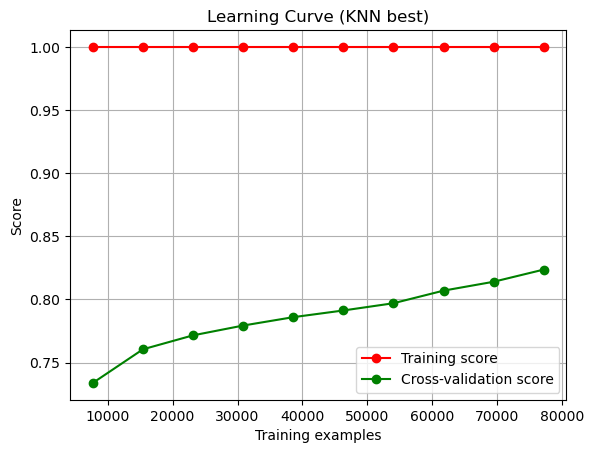

In [66]:
plot_learning_curve(knn1, "Learning Curve (KNN best)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

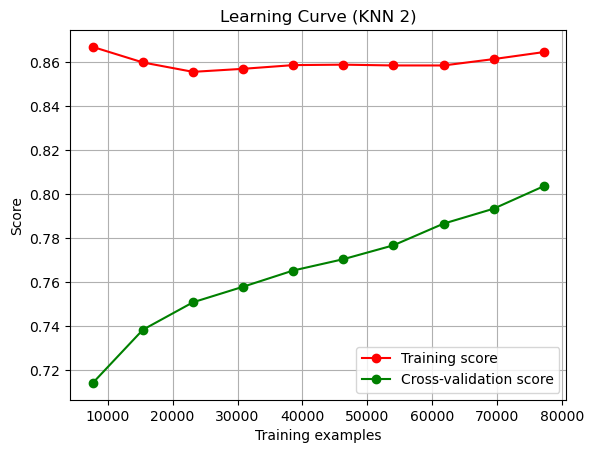

In [67]:
plot_learning_curve(knn2, "Learning Curve (KNN 2)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

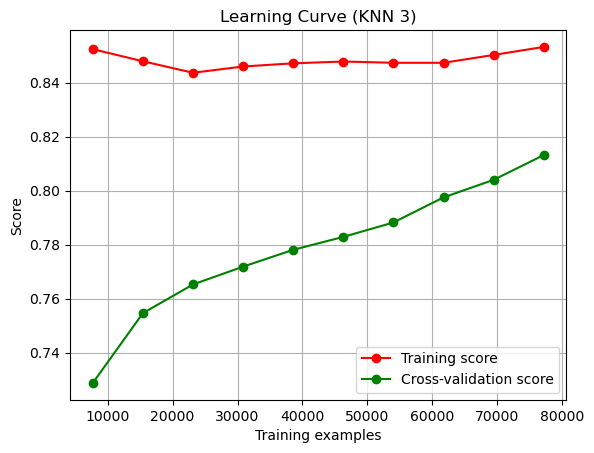

In [68]:
plot_learning_curve(knn3, "Learning Curve (KNN 3)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

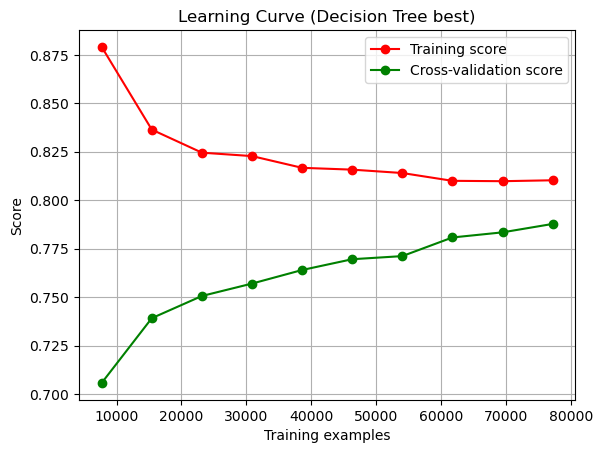

In [69]:
plot_learning_curve(fdt1, "Learning Curve (Decision Tree best)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

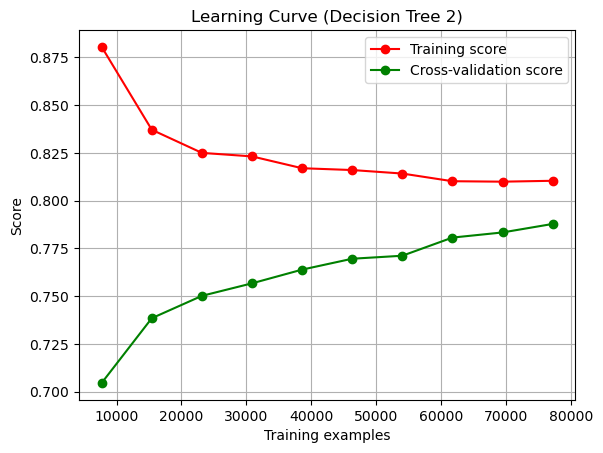

In [70]:
plot_learning_curve(fdt2, "Learning Curve (Decision Tree 2)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

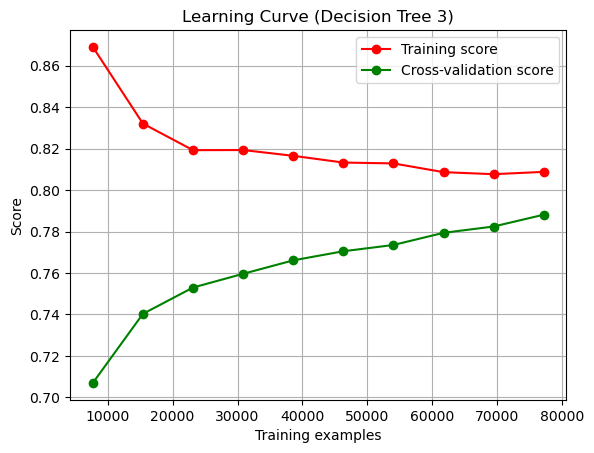

In [71]:
plot_learning_curve(fdt3, "Learning Curve (Decision Tree 3)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages

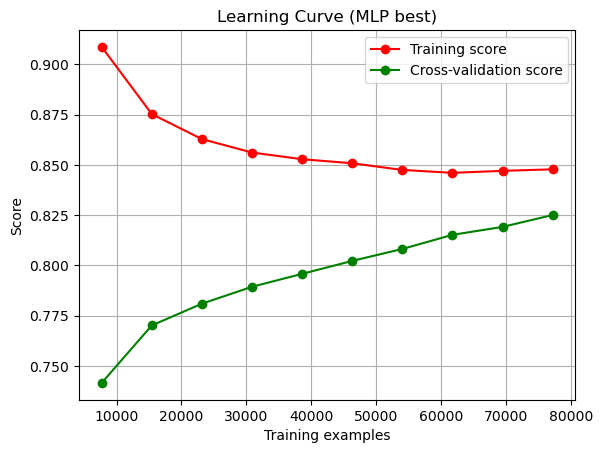

In [72]:
plot_learning_curve(mlp1, "Learning Curve (MLP best)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

In [ ]:
plot_learning_curve(mlp2, "Learning Curve (MLP 2)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Habiba Asif\anaconda3\lib\site-packages

In [ ]:
plot_learning_curve(mlp3, "Learning Curve (MLP 3)", X, y, cv=kfold, scoring=auc_roc_scorer)
plt.show()

In [ ]:
# GRAPHICAL AND TABULAR COMPARISIONS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Function to load models from pickle files
def load_models(file_names):
    models = []
    for file_name in file_names:
        with open(file_name, 'rb') as file:
            model = pickle.load(file)
            models.append(model)
    return models

# Function to make predictions using a model
def make_prediction(model, test_data):
    y_pred = model.predict(test_data)
    y_proba = model.predict_proba(test_data)
    return {'y_pred': y_pred, 'y_proba': y_proba}

# Function to evaluate and print model performance metrics
def eval_model(model, x_test, y_test, x_train, y_train):
    # Prediction on test set
    y_pred_test = model.predict(x_test)
    y_proba_test = model.predict_proba(x_test)
    
    # Prediction on train set
    y_proba_train = model.predict_proba(x_train)
    y_pred_train = model.predict(x_train)

    # Calculate ROC AUC for each class (for train and test)
    roc_auc_scores1 = roc_auc_score(y_train, y_proba_train, multi_class='ovr')
    roc_auc_scores2 = roc_auc_score(y_train, y_proba_train, multi_class='ovo')
    roc_auc_scores3 = roc_auc_score(y_test, y_proba_test, multi_class='ovr')
    roc_auc_scores4 = roc_auc_score(y_test, y_proba_test, multi_class='ovo')
    
    # Calculate other metrics
    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    precision_scores = np.round(precision_score(y_test, y_pred_test, average=None), 2)
    recall_scores = np.round(recall_score(y_test, y_pred_test, average=None), 2)
    accuracy_test = round(model.score(x_test, y_test), 2)
    accuracy_train = round(model.score(x_train, y_train), 2)
    
    # Store the metrics in a dictionary
    metrics_dict = {
        "Model": str(model),
        "ROC AUC (Train ovr)": roc_auc_scores1,
        "ROC AUC (Train ovo)": roc_auc_scores2,
        "ROC AUC (Test ovr)": roc_auc_scores3,
        "ROC AUC (Test ovo)": roc_auc_scores4,
        "Confusion Matrix": confusion_matrix_test,
        "Precision Scores": precision_scores,
        "Recall Scores": recall_scores,
        "Accuracy (Test Set)": accuracy_test,
        "Classification Score (Test Set)": accuracy_test,
        "Classification Score (Train Set)": accuracy_train
    }

    # Print the metrics neatly
    print("\nMetrics for Model:", str(model))
    for metric, value in metrics_dict.items():
        if metric not in ["Confusion Matrix", "Precision Scores", "Recall Scores"]:
            print(f"{metric}: {value}")
        else:
            print(f"\n{metric}:")
            print(value)

# Function to plot ROC curves for multiple models
def plot_roc_curves(models, names, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for model, name in zip(models, names):
        y_proba = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot learning curves for multiple models
def plot_learning_curves(models, names, X, y, cv, scoring, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(8, 6))
    for model, name in zip(models, names):
        plt.title(f"Learning Curve ({name})")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        plt.grid()
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        plt.legend(loc="best")
        plt.show()


In [ ]:
# List of model filenames
model_files = ["knn1.pkl", "knn2.pkl", "knn3.pkl", "mlp1.pkl", "mlp2.pkl", "mlp3.pkl", "fdt1.pkl", "fdt2.pkl", "fdt3.pkl"]

# Load the models
models = load_models(model_files)


In [ ]:
for model in models:
    eval_model(model, X_test, y_test, X_train, y_train)


In [ ]:
model_names = ["KNN Model 1", "KNN Model 2", "KNN Model 3", "MLP Model 1", "MLP Model 2", "MLP Model 3", "Decision Tree Model 1", "Decision Tree Model 2", "Decision Tree Model 3"]

plot_roc_curves(models, model_names, X_test, y_test)


In [ ]:
# Create AUC-ROC scorer
auc_roc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# Plot learning curves for the models
plot_learning_curves(models, model_names, X, y, cv=kfold, scoring=auc_roc_scorer)
